# **NFL PLayer's and their Statistics**

## **Description**
In this project, I took a look at a CSV file for statistics of NFL players. The following statistics are included in the file:
* 'nflId': a unique ID for each player
* 'height': the height of each player (text string... will fix in cleaning to inches)
* 'weight': the player's weight in lbs
* 'birthDate': the year the player was born
* 'collegeName': the name of the college the player attended
* 'position': the position the player fulfills
* 'displayName': the name of the player

## **Plan for EDA**
My plan for EDA is to look at all the factors and make sure they are all follow the same formatting. Then, I am going to make sure there are not null values that could hinder analysis. I am also going to transform categorical data into numerical to prepare for modeling. After that I am look at the statistics for all the numerical data.


## **Cleaning the data**

Firstly, we need to see what data types we have in our dataframe and how many null values we have. Also, we are going to see if there are any duplicates.

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats 

df = pd.read_csv("players.csv")
df_nfl = df.copy()

**As we can see, there are a total of 5 object date values**
<br>
We can notice that height should not be an object type. Before we look into that, lets check how many null values we have

In [89]:
df_nfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1303 non-null   int64 
 1   height       1303 non-null   object
 2   weight       1303 non-null   int64 
 3   birthDate    1303 non-null   object
 4   collegeName  1303 non-null   object
 5   position     1303 non-null   object
 6   displayName  1303 non-null   object
dtypes: int64(2), object(5)
memory usage: 71.4+ KB


In [90]:
df_nfl.isnull().sum()

nflId          0
height         0
weight         0
birthDate      0
collegeName    0
position       0
displayName    0
dtype: int64

In [91]:
duplicate = df_nfl[df_nfl.duplicated()]
duplicate
print("There are {} unique values in the 'nflId' column.".format(len(df_nfl['nflId'].unique())))

There are 1303 unique values in the 'nflId' column.


Since there are no null values or duplicates, we are going to format the height column values to be in inches. Then, we are going to see if there are any outliers.
<br>

In [92]:
# This section of code will change the height column into inches

height = df_nfl['height']

def height_in_inches(x):
    if "-" in x:
        temp = x.split("-")
        total_height = (int(temp[0]) * 12) + int(temp[1])
        return total_height
    else:
        return int(x)

height_inches = height.apply(height_in_inches)
df_nfl['height'] = height_inches

In [93]:
# Changing the name of the height column into height_inches

df_nfl.columns = ['height_inches' if col == 'height' else col for col in df_nfl.columns]

# Changine the name of the weight column into weight_lbs
df_nfl.columns = ['weight_lbs' if col == 'weight' else col for col in df_nfl.columns]
df_nfl.head()

,nflId,height_inches,weight_lbs,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


Now that we have the height column formatted in inches, lets take a look to see if there are any abnormal values

In [94]:
df_nfl['height_inches'].sort_values()

487     66
14      66
291     66
472     67
318     67
        ..
1033    79
1045    79
1187    80
516     80
908     80
Name: height_inches, Length: 1303, dtype: int64

As we can see, the smallest height in inches is 66, whch is not abnormal. Also, the tallest height in inches is 80, which is also not abnormal. Therefore, we so not have any outliers in the height column.
<br>
Repeating the same process for weight:


In [95]:
df_nfl['weight_lbs'].sort_values()

793     159
728     160
318     168
472     168
201     169
       ... 
1034    345
1069    347
1292    347
1163    350
1222    352
Name: weight_lbs, Length: 1303, dtype: int64

As we can see, are no abnormal values in this Pandas series, therefore, there are not numerical outliers in the dataset. This will make running analysis easier.

Now, we are going to split the 'birthDate' column into year, month, and date. We are doing this because we may want to explore how year can affect changes in player statistics.

In [96]:
df_nfl['birthDate'] = pd.to_datetime(df['birthDate'], format = "mixed",errors='coerce')
df_nfl['birthDate'] = df_nfl['birthDate'].dt.strftime('%Y-%m-%d')
df_nfl[['birth_year', 'birth_month', 'birth_day']] = df_nfl['birthDate'].str.split('-', n=2, expand= True)

In [97]:
df_nfl.head()

,nflId,height_inches,weight_lbs,birthDate,collegeName,position,displayName,birth_year,birth_month,birth_day
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,09,10
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,11,01
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,12,18
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,11,04
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,07,01


Finally, we are going to do one-hot encoding for the Positions column. The reason for this adjustment would be for having the opportunity to run models on the dataset later on. As of now in this project, there is ***no need*** to have this adjustment in the table.

In [98]:
df_nfl = pd.get_dummies(df_nfl, columns = ['position'], drop_first = True)
df_nfl.head()

,nflId,height_inches,weight_lbs,birthDate,collegeName,displayName,birth_year,birth_month,birth_day,position_DB,...,position_MLB,position_NT,position_OLB,position_P,position_QB,position_RB,position_S,position_SS,position_TE,position_WR
0,2539334,72,190,1990-09-10,Washington,Desmond Trufant,1990,09,10,False,...,False,False,False,False,False,False,False,False,False,False
1,2539653,70,186,1988-11-01,Southeastern Louisiana,Robert Alford,1988,11,01,False,...,False,False,False,False,False,False,False,False,False,False
2,2543850,69,186,1991-12-18,Purdue,Ricardo Allen,1991,12,18,False,...,False,False,False,False,False,False,False,True,False,False
3,2555162,73,227,1994-11-04,Louisiana State,Deion Jones,1994,11,04,False,...,True,False,False,False,False,False,False,False,False,False
4,2555255,75,232,1993-07-01,Minnesota,De'Vondre Campbell,1993,07,01,False,...,False,False,True,False,False,False,False,False,False,False


## **Cleaned Data**

Using the cleaned data, we will have a dataframe representing the clean data and a dataframe for visualization.


### Visualization DateFrame
Below, we are going to have a dataframe that will only contain the nflId, height, weight, birth_year, birth_month, and birth_day columns

In [99]:
cleaned_cols = df_nfl.columns.tolist()
cleaned_cols.remove('birthDate')
df_cleaned = df_nfl[cleaned_cols]

df_viz = df_nfl.loc[:,['nflId','height_inches','weight_lbs','birth_year','birth_month','birth_day']]
df_viz['position'] = df.loc[:,'position']

df_viz.head()

,nflId,height_inches,weight_lbs,birth_year,birth_month,birth_day,position
0,2539334,72,190,1990,09,10,CB
1,2539653,70,186,1988,11,01,CB
2,2543850,69,186,1991,12,18,SS
3,2555162,73,227,1994,11,04,MLB
4,2555255,75,232,1993,07,01,OLB


### Cleaned Data Frame

In [105]:
df_cleaned.loc[:,['height_inches','weight_lbs']].describe()

,height_inches,weight_lbs
count,1303.000000,1303.000000
mean,73.220261,222.537222
std,2.461030,29.476747
min,66.000000,159.000000
25%,71.000000,200.000000
50%,73.000000,216.000000
75%,75.000000,242.000000
max,80.000000,352.000000


## **Plotting The Visualization Data Frame**

In [16]:
pos_height_mean = df_viz.groupby('position')['height_inches'].mean()
pos_height_median = df_viz.groupby('position')['height_inches'].median()

pos_weight_mean = df_viz.groupby('position')['weight_lbs'].mean()
pos_weight_median = df_viz.groupby('position')['weight_lbs'].median()



Text(0.5, 1.0, 'Position with Weight in Pounds')

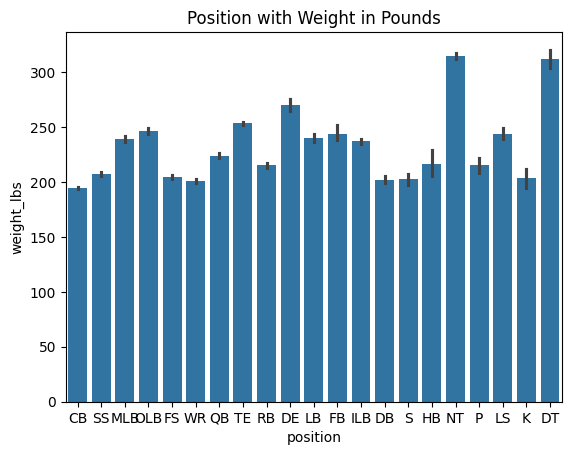

In [17]:
sns.barplot(df_viz, x = 'position', y = 'weight_lbs').set_title("Position with Weight in Pounds")

Text(0.5, 1.0, 'Position with Mean Weight in Pounds')

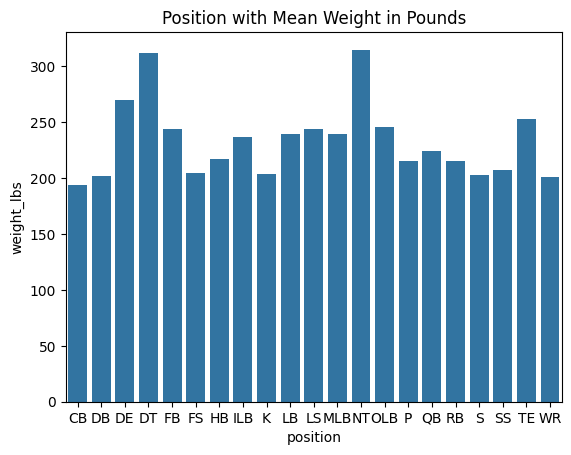

In [18]:
sns.barplot(pos_weight_mean).set_title("Position with Mean Weight in Pounds")

Text(0.5, 1.0, 'Position and Height Scatter Plot in Inches')

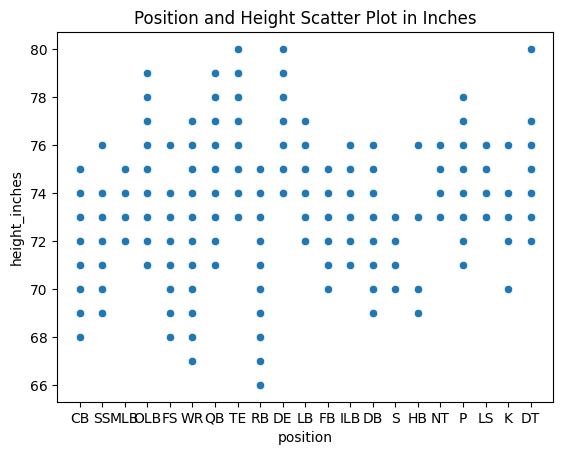

In [19]:
sns.scatterplot(df_viz, x='position', y = 'height_inches').set_title("Position and Height Scatter Plot in Inches")

Text(0.5, 1.0, 'Position with Weight Scatter Plot in Pounds')

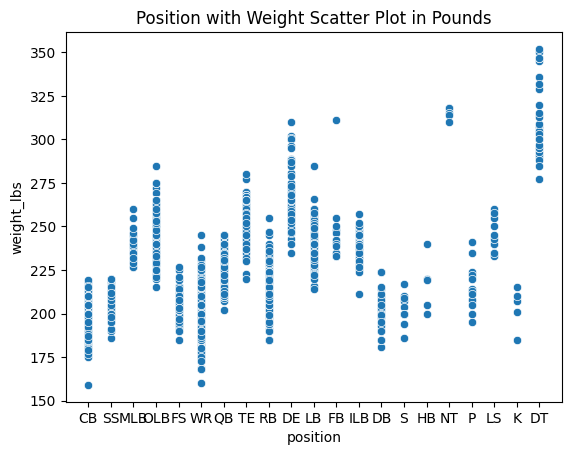

In [20]:
sns.scatterplot(df_viz, x='position', y = 'weight_lbs').set_title("Position with Weight Scatter Plot in Pounds")

In [21]:
year_weight_mean = df_viz.groupby('birth_year')['weight_lbs'].mean()

<Axes: xlabel='birth_year', ylabel='height_inches'>

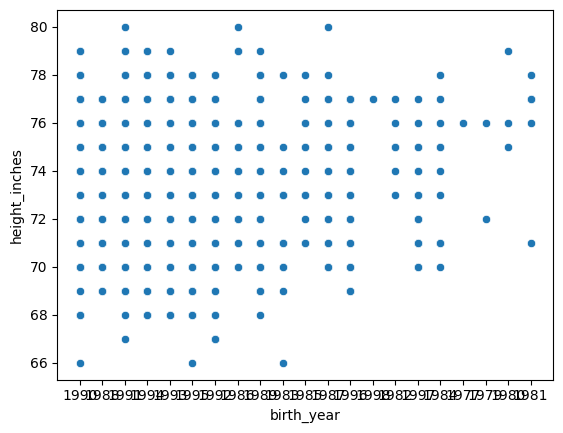

In [22]:
sns.scatterplot(df_viz, x='birth_year', y = 'height_inches')

### Skewness of the data
Looking at the weight and the height, lets evaluate the skewness of both

In [107]:
print("The skewness for the weight of each player: {}".format(df_nfl['weight_lbs'].skew()))
print("The skewness for the height of each player: {}".format(df_nfl['height_inches'].skew()))

The skewness for the weight of each player: 0.9603906721519914
The skewness for the height of each player: 0.048628119850464106


Evaluating the skew-values, we can see that the weight column has a slight positive skew, meaning that there are some players that weigh more than the rest of the players. As far as the height of players, we can see that the height of players are relatively symmetric. Here are the following graphs:

<Axes: xlabel='weight_lbs', ylabel='Density'>

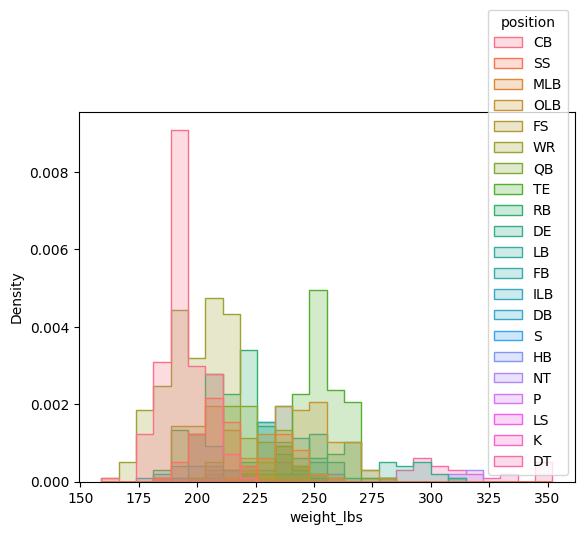

In [118]:
sns.histplot(data = df_viz,x = 'weight_lbs',hue = 'position',element="step",
    stat="density")

<Axes: xlabel='height_inches', ylabel='Density'>

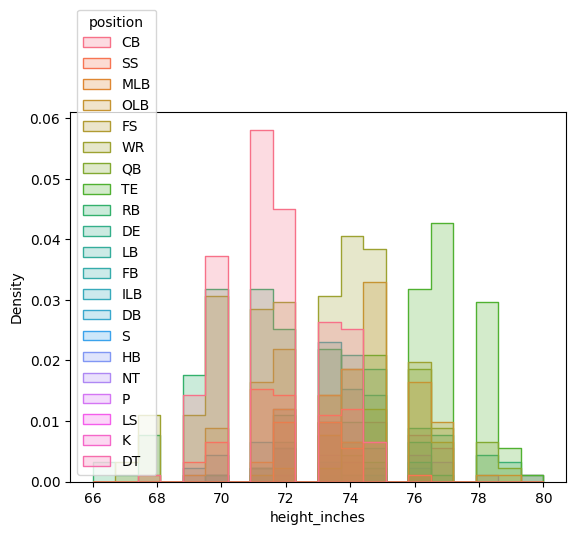

In [119]:
sns.histplot(data = df_viz,x = 'height_inches',hue = 'position',element="step",
    stat="density")

## Hypotheses

* Does birth year and height have a correlation?
* Are the weight of a DT and weight of a CB are significantly different?
* Are the height of a DT and height of a CB are significantly different?


## Formal Hypothesis Test

I will be running a test on if the weight of a DT (defensive tackle) and weight of a CB (corner back) are significantly different with a signifcance level of 1%
<br>
$$\mu_1 = \text{mean weight for DT}$$
$$\mu_2 = \text{mean weight for CB}$$
$$H_0 = \mu_1 - \mu_2 = 0$$
$$H_A = \mu_1 - \mu_2 \neq 0$$

In [23]:
alpha=0.01
dt_weight = df_viz.loc[df_viz.position == 'DT'].weight_lbs
cb_weight = df_viz.loc[df_viz.position == 'CB'].weight_lbs

In [24]:
alpha=0.01
dt_weight = df_viz.loc[df_viz.position == 'DT'].weight_lbs
de_weight = df_viz.loc[df_viz.position == 'DE'].weight_lbs

In [25]:
t_value1, p_value1 = stats.ttest_ind(dt_weight, cb_weight)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  50.74107754466567 , p_value1 =  9.243692928154459e-124


In [26]:
t_value2, p_value2 = stats.ttest_ind(dt_weight, de_weight)
print("t_value1 = ",t_value2, ", p_value1 = ", p_value2)

t_value1 =  8.915811934282443 , p_value1 =  2.1524626470251094e-13


In [19]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no difference between weight of defensive tackles and weight of cornerbacks.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is a difference between weight of defensive tackles and weight of corner backs.")

Conclusion: since p_value 9.243692928154459e-124 is less than alpha 0.01 
Reject the null hypothesis that there is no difference between weight of defensive tackles and weight of cornerbacks.


## **Suggestions for further analysis**
To increase further analysis, I see that the total entries in this CSV file is 1303. With the NFL being such a large franchise, I feel as if there are some NFL players missing. Getting another table and comparing the values could be of importance. Also, running an analysis on all positions weight compared to Defensive Tackle could be a good way at leading to a Machine Learning algorithm to predict position based off of weight.

## **Summary**
In this report, we were able to take a CSV file of players in the NFL with their date of birth, weight, height, and position played. I was able to clean the table to have all column values be of the same format: height was either in feet-inches or just inches, and date of birth was either %Y-%m-%d, %Y/%m/%d, %d-%m-%Y, or %d/%m/%Y. After the columns were all in the same format, I used onehot-encoding to change the positions column from an object data type to numeric. Finally, the data cleaning phase was complete, in which I was able to run visualizations to help motivate hypotheses. Once I found a strong hypothesis, I ran a formal test to conclude that I am 99% confident that 99% of the data shows that weight is different between defensive tackles and cornerbacks.